<a href="https://colab.research.google.com/github/yashyakumar/Hotel_Booking_Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#Importing required packages for Data Cleaning,Manipulation,Visualisation

In [7]:
#Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path='/content/drive/MyDrive/Copy of Hotel Bookings.csv'
df=pd.read_csv(file_path)

# Lets understand the data
###hotel

*   City Hotel
*   Resort Hotel


###is_canceled-The customer canceled the booking or not


*   0:Not Canceled
*   1:Canceled


###lead_time-days between booking and arrival
###arrival_date_year

*   Year of arrival(2015 - 2017)

###arrival_date_month
*   Month of arrival(January-December)

###arrival_date_week_number 

*   Week number of arrival(1 - 53)

###arrival_date_day_of_month
*   Day of arrival(1-31)

###stays_in_weekend_nights
*  No of weekend nights (Sat/Sun) the customer stayed or booked to stay at the hotel

###stays_in_week_nights
*  No of week nights (Mon - Fri) the customer stayed or booked to stay at the hotel

###adults
###children
###babies
###meal-Type of meal
*  BB : Bed and Breakfast
*  HB : Half Board(Breakfast and one meal mostly dinner)
*  FB : Full Board(Breakfast, Lunch, Dinner)
*  SC/Undefined: No Meal package

###Country - Country of the customer
###market_segment
###distribution_channel
###is_repeated_guest - whether the booking is from repeated customer
* 1 : Yes
* 0 : No

###deposit_type - whether customer made a deposit to guarantee the booking
* No Deposit : No deposit was made
* Non Refund : Deposit was made which cant be refunded
* Refundable : Deposit was made which can be refundable

### customer_type 
* Contract : When the booking is associated to a contract
* Group    : When the booking is associated to a group
* Transient : When the booking is associated to a transient customer
* Transient Group : When the booking is associated to a transient group
  
###adr(Average Daily Rate)
* ADR  = $\frac{Revenue Earned by Rooms}{Noof Rooms Sold}$

###Looking to shape of data to find out no of rows and columns

In [42]:
df.shape

(118898, 30)

In [43]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#Data Cleaning

##Finding no of Nan or Null values present in our dataset

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

###There are 94% of values in company are null values so we can drop the whole column.The agent column also having 13% of null values and we dont need this agent column.So we can drop these columns

In [15]:
df.drop(['company','agent'],inplace=True,axis=1) #dropping columns which have most no of null values

### There are some 488 rows having null values which is negligible in 118938 so we simply dropping these rows and other rows which are having null values

In [16]:
df.dropna(axis=0,inplace=True) # this will  drop only the rows becuase we passed axis=0

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

([<matplotlib.patches.Wedge at 0x7f9f65ba3390>,
 [Text(-0.9953716224972733, -0.5759646978132826, 'City Hotel'),
  Text(0.9520945438510592, 0.5509228435716237, 'Resort Hotel')],
 [Text(-0.5626013518462848, -0.3255452639814206, '66.7%'),
  Text(0.5193242966460322, 0.3005033692208856, '33.3%')])

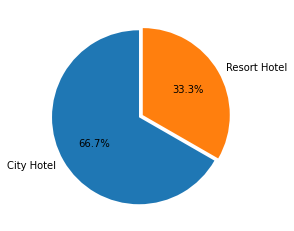

In [18]:
labels=df['hotel'].value_counts().index.to_list()
sizes=df['hotel'].value_counts().to_list()
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=(0.05,0),startangle=90)

###From the above pie chart we can observe that most of the people are choosing city hotel over resort hotel

([<matplotlib.patches.Wedge at 0x7f9f655dac10>,
 [Text(-1.0983309753703554, -0.06057283666796486, 'Not Canceled'),
  Text(1.1482551046854357, 0.06332625493300195, 'Canceled')],
 [Text(-0.5990896229292847, -0.03303972909161719, '62.9%'),
  Text(0.6490137548222027, 0.03579310061430545, '37.1%')])

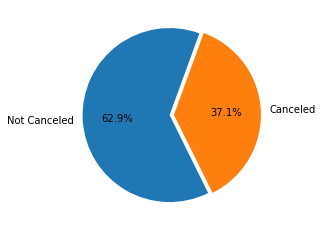

In [19]:
labels=['Not Canceled','Canceled']
sizes=df['is_canceled'].value_counts().to_list()
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=70,explode=(0,0.05))

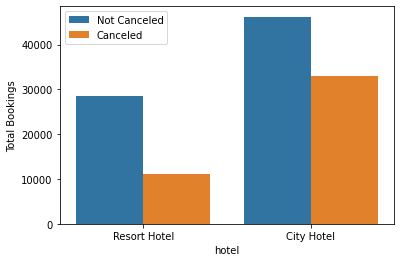

In [46]:
sns.countplot(x='hotel',data=df,hue='is_canceled')
plt.ylabel('Total Bookings')
plt.legend(['Not Canceled','Canceled'])

###We can observe that most of the bookings are Not Canceled and 37% of the bookings are canceled.
###We can also observe that most cancellations are occured in city hotel and there are less cancellations in resort hotel

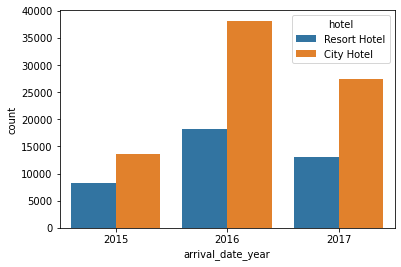

In [20]:
sns.countplot(x='arrival_date_year', data=df,hue='hotel')

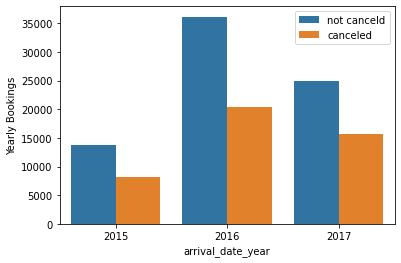

In [45]:
sns.countplot(x='arrival_date_year',data=df,hue='is_canceled')
plt.ylabel('Yearly Bookings')
plt.legend(['not canceld','canceled'])

### From the above plots we can observe that there is an increase in bookings from 2015 to 2016 and decrease from 2016 to 2017.The city hotel is always preffered more than resort hotel in every year
###The bookings which are canceled also more in 2016 followed by 2017,2015

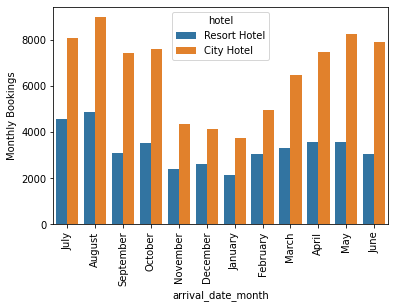

<Figure size 1080x720 with 0 Axes>

In [44]:
plt.xticks(rotation=90)
sns.countplot(x='arrival_date_month',data=df,hue='hotel')
plt.ylabel('Monthly Bookings')
fig=plt.figure(figsize=(15,10))


In [48]:
canceled=df.loc[df['is_canceled']==1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

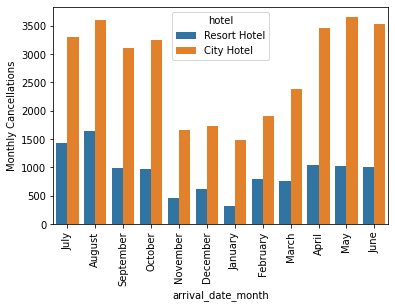

In [49]:
sns.countplot(x='arrival_date_month',data=canceled,hue='hotel')
plt.ylabel('Monthly Cancellations')
plt.xticks(rotation=90)

### From the above we can observe that in every month bookings in City hotel are greater than bookings in Resort hotel.
### Most no Cancellations also occured in City Hotel Compared to Resort Hote

In [22]:
month_wise_bookings=df.groupby('arrival_date_month')['is_canceled'].count().reset_index()
month_wise_bookings.sort_values('is_canceled',ascending=False,inplace=True)
month_wise_bookings

,arrival_date_month,is_canceled
1,August,13852
5,July,12628
8,May,11779
10,October,11095
0,April,11045
6,June,10927
11,September,10467
7,March,9739
3,February,8012
9,November,6752


Text(0, 0.5, 'Monthly Bookings')

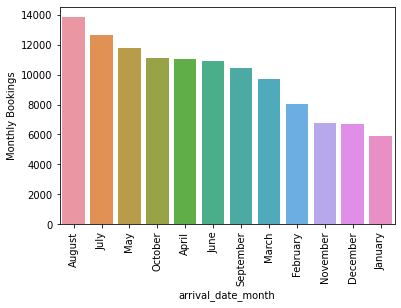

In [23]:
plt.xticks(rotation=90)

sns.barplot(x='arrival_date_month',y='is_canceled',data=month_wise_bookings)
plt.ylabel('Monthly Bookings')

###From the above we can see that most of the bookings are happened in the month August.From April to October most bookings are made and we can also observe that from November to February least no of bookings are made

In [24]:
not_canceld_months=df.loc[df['is_canceled']==0].groupby('arrival_date_month')['is_canceled'].count().reset_index()
not_canceld_months.rename(columns={'is_canceled':'Monthly Bookings'},inplace=True)
not_canceld_months.sort_values('Monthly Bookings',inplace=True,ascending=False)

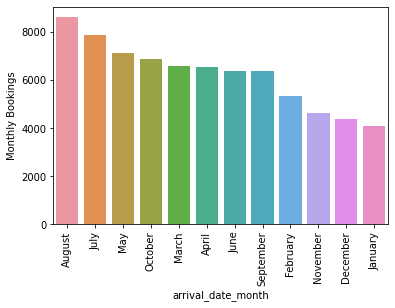

In [25]:
plt.xticks(rotation=90)
sns.barplot(x='arrival_date_month',y='Monthly Bookings',data=not_canceld_months)

In [26]:
canceld_months=df.loc[df['is_canceled']==1].groupby('arrival_date_month')['is_canceled'].count().reset_index()
canceld_months.rename(columns={'is_canceled':'Monthly Bookings'},inplace=True)
canceld_months.sort_values('Monthly Bookings',inplace=True,ascending=False)
# canceld_months['Monthly Bookings']=round(canceld_months['Monthly Bookings']/month_wise_bookings['is_canceled'] *100,2)

canceld_months

,arrival_date_month,Monthly Bookings
1,August,5234
5,July,4736
8,May,4677
6,June,4534
0,April,4512
10,October,4228
11,September,4100
7,March,3148
3,February,2695
2,December,2363


Text(0, 0.5, 'Bookings Cancellation %')

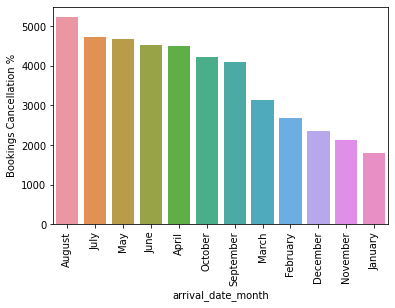

In [27]:
plt.xticks(rotation=90)
sns.barplot(x='arrival_date_month',y='Monthly Bookings',data=canceld_months)
plt.ylabel('Bookings Cancellation')

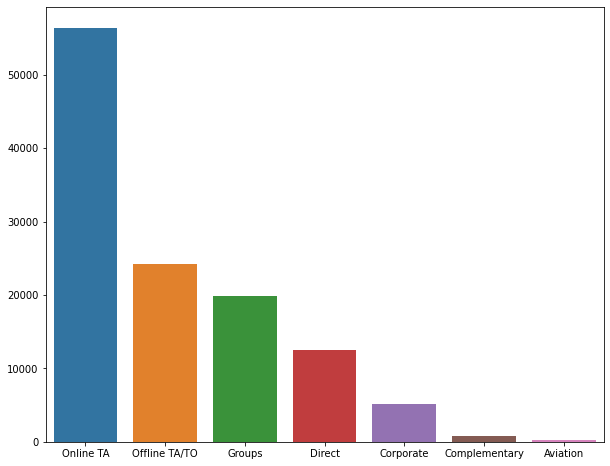

In [47]:
fig=plt.figure(figsize=(10,8))
booking_type=df['market_segment'].value_counts().index.to_list()
no_of_bookings=df['market_segment'].value_counts().to_list()
sns.barplot(x=booking_type,y=no_of_bookings)


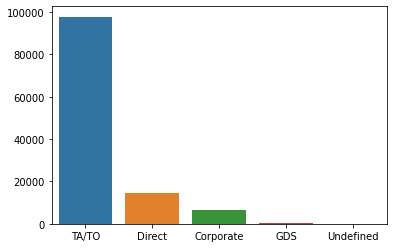

In [52]:
distributions=df['distribution_channel'].value_counts().index.to_list()
bookings=df['distribution_channel'].value_counts().to_list()
sns.barplot(x=distributions,y=bookings)

###From the above plot we can see that most of the Bookings are made through both Online/Offline Travel agents and Tour Operators 

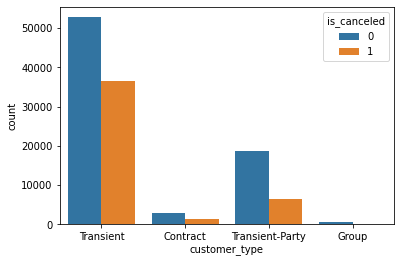

In [36]:
sns.countplot(x='customer_type',data=df,hue='is_canceled')

###From the above we can see that most bookings are made and canceled by Transient Customers

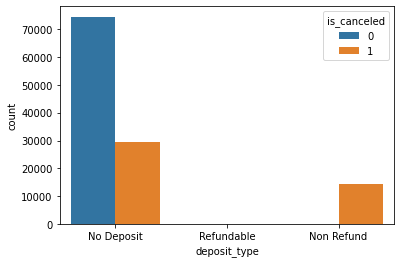

In [58]:
sns.countplot(x='deposit_type',hue='is_canceled',data=df)
plt.legend(['Not Canceled','Canceled'])

###From the above we can observe that most no of bookings doesn't require any deposit.This could may be the reason for most no of cancellations in No Deposit

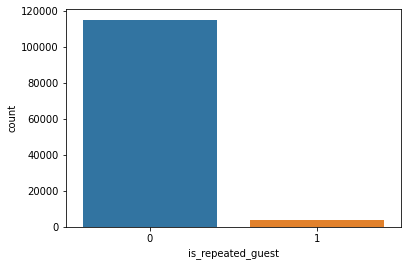

In [59]:
sns.countplot(x='is_repeated_guest',data=df)

###We can observe that there are less no of repeated guests

In [37]:
country=df.groupby('country')[['hotel','is_canceled']].count().reset_index()
country.sort_values('is_canceled',ascending=False,inplace=True)
country=country.head(10)
country

,country,hotel,is_canceled
135,PRT,48586,48586
59,GBR,12129,12129
56,FRA,10415,10415
51,ESP,8568,8568
43,DEU,7287,7287
81,ITA,3766,3766
76,IRL,3375,3375
15,BEL,2342,2342
25,BRA,2224,2224
123,NLD,2104,2104


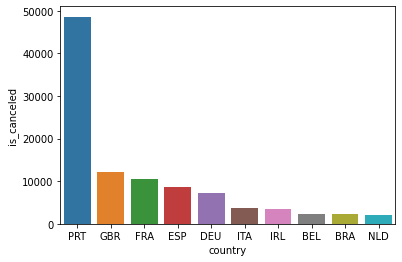

In [38]:
sns.barplot(x='country',data=country,y='is_canceled')

###From the above we can obesrve that most of the customers are from Portugal,Britan,France,Spain

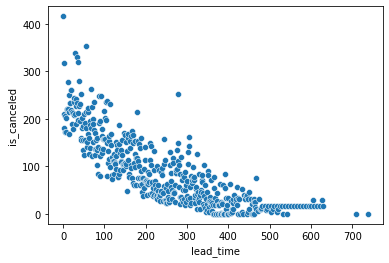

In [74]:
# sns.lineplot(x='is_canceled',y='lead_time',data=df)
new=df.groupby('lead_time')['is_canceled'].sum().reset_index()
sns.scatterplot(x='lead_time',y='is_canceled',data=new)

###From the above we can observe that with the increase of lead time the cancellation rate also increases

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

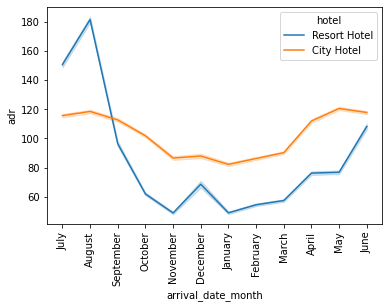

In [65]:
adr=df.loc[df['is_canceled']==0]
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=adr)
plt.xticks(rotation=90)

In [40]:
meals=df['meal'].value_counts().index.to_list()
sizes=df['meal'].value_counts().to_list()

([<matplotlib.patches.Wedge at 0x7f9f63080890>,
 [Text(-0.8310821778146824, 0.7206264037063899, 'BB'),
  Text(0.5499159274698551, -0.9526764785145948, 'HB'),
  Text(1.0195531452924926, -0.4129302409901526, 'SC'),
  Text(1.0970741248270728, -0.08017708297831867, 'Undefined'),
  Text(1.0997554819778173, -0.023192237057667698, 'FB')],
 [Text(-0.6044234020470417, 0.5240919299682835, '77.3%'),
  Text(0.3999388563417128, -0.6928556207378871, '12.1%'),
  Text(0.7414931965763583, -0.3003129025382928, '8.9%'),
  Text(0.7978720907833257, -0.058310605802413575, '1.0%'),
  Text(0.7998221687111399, -0.016867081496485598, '0.7%')])

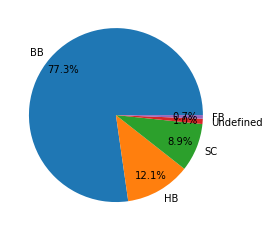

In [41]:
explode=(0,0,0,0.5,0.5)

plt.pie(sizes,labels=meals,autopct='%1.1f%%',pctdistance=0.8)

###From the above we can observe that most of the meals ordered are BB.

In [ ]:
df.describe()

In [ ]:
df[df['adults']==0]